# 2장. 지도 학습

*아래 링크를 통해 이 노트북을 주피터 노트북 뷰어(nbviewer.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.*

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.org/github/rickiepark/intro_ml_with_python_2nd_revised/blob/main/02-supervised-learning.ipynb"><img src="https://jupyter.org/assets/share.png" width="60" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/intro_ml_with_python_2nd_revised/blob/main/02-supervised-learning.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

<b><font size=2>이 노트북은 맷플롯립 그래프에 한글을 쓰기 위해 나눔 폰트를 사용합니다. 컴퓨터에 나눔 폰트가 없다면 설치해 주세요.<br><br><font color='red'>주의: 코랩에서 실행하는 경우 아래 셀을 실행하고 ⌘+M . 또는 Ctrl+M . 을 눌러 런타임을 재시작한 다음 처음부터 다시 실행해 주세요.</font></b>

In [62]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys
if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
    # 사이킷런 최신 버전을 설치합니다.
    !pip install -q --upgrade scikit-learn
    # mglearn을 다운받고 압축을 풉니다.
    !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
    !tar -xzf mglearn.tar.gz
    !wget -q -O data.tar.gz https://bit.ly/data-tar-gz
    !tar -xzf data.tar.gz
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    fm._rebuild()

In [63]:
import sklearn
from preamble import *
import matplotlib

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# 코랩에서 넘파이 경고를 나타내지 않기 위해
import sys
if 'google.colab' in sys.modules:
    import warnings
    warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [64]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 2.1 분류와 회귀
## 2.2 일반화, 과대적합, 과소적합
### 2.2.1 모델 복잡도와 데이터셋 사이즈의 관계

## 2.3 지도 학습 알고리즘

[[ 9.963  4.597]
 [11.033 -0.168]
 [11.542  5.211]
 [ 8.693  1.543]
 [ 8.106  4.287]
 [ 8.31   4.806]
 [11.93   4.649]
 [ 9.673 -0.203]
 [ 8.348  5.134]
 [ 8.675  4.476]
 [ 9.177  5.093]
 [10.24   2.455]
 [ 8.689  1.487]
 [ 8.922 -0.64 ]
 [ 9.491  4.332]
 [ 9.257  5.133]
 [ 7.998  4.853]
 [ 8.184  1.296]
 [ 8.734  2.492]
 [ 9.323  5.098]
 [10.064  0.991]
 [ 9.5   -0.264]
 [ 8.345  1.638]
 [ 9.502  1.938]
 [ 9.151  5.498]
 [11.564  1.339]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
X.shape: (26, 2)


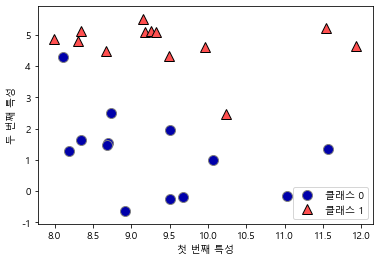

In [65]:
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
print(X) # x data (shape(26,2))
print(y) # y data (label)
plt.legend(["클래스 0", "클래스 1"], loc=4) # 1-1시 이후 반시계 방향으로 legend 위치
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)
plt.show() # 책에는 없음

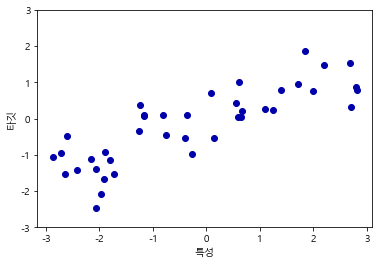

In [66]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")
plt.show() # 책에는 없음

In [67]:
# 유방암 데이터
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [68]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [69]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [70]:
print("클래스별 샘플 갯수:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 갯수:
 {'malignant': 212, 'benign': 357}


In [71]:
print(cancer.target_names)
print(np.bincount(cancer.target))
for k, v in zip(cancer.target_names, np.bincount(cancer.target)):
    print(k, v)

['malignant' 'benign']
[212 357]
malignant 212
benign 357


In [72]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [73]:
import pandas as pd
cancer_data = cancer.data
cancer_df =  pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
cancer_df['label'] = cancer.target
cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  ...  \
0        17.99         10.38          122.80     1001.0  ...   
1        20.57         17.77          132.90     1326.0  ...   
2        19.69         21.25          130.00     1203.0  ...   
3        11.42         20.38           77.58      386.1  ...   
4        20.29         14.34          135.10     1297.0  ...   

   worst concave points  worst symmetry  worst fractal dimension  label  
0                  0.27            0.46                     0.12      0  
1                  0.19            0.28                     0.09      0  
2                  0.24            0.36                     0.09      0  
3                  0.26            0.66                     0.17      0  
4                  0.16            0.24                     0.08      0  

[5 rows x 31 columns]

In [74]:
# 보스턴 주택 데이터셋이 1.0 버전에 deprecated 되었고 1.2 버전에서 삭제됩니다.
# 경고 메시지를 피하기 위해 다음 코드를 추가합니다.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


In [75]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [76]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['label'] = boston.target
boston_df.tail()

CRIM   ZN  INDUS  CHAS  ...  PTRATIO       B  LSTAT  label
501  0.06  0.0  11.93   0.0  ...     21.0  391.99   9.67   22.4
502  0.05  0.0  11.93   0.0  ...     21.0  396.90   9.08   20.6
503  0.06  0.0  11.93   0.0  ...     21.0  396.90   5.64   23.9
504  0.11  0.0  11.93   0.0  ...     21.0  393.45   6.48   22.0
505  0.05  0.0  11.93   0.0  ...     21.0  396.90   7.88   11.9

[5 rows x 14 columns]

In [77]:
# 기존 boston 주택가 column은 13개 였으나 mglearn에서 제공하는 dataset의 column은 104개로 늘어났다.
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


### 2.3.2 k-최근접 이웃
#### k-최근접 이웃 분류

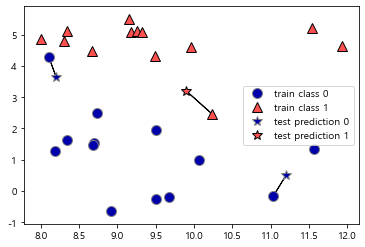

In [78]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

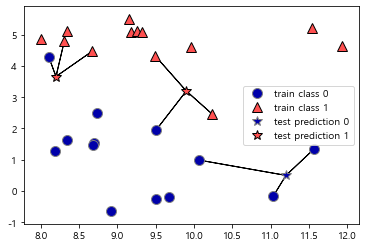

In [79]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [80]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [81]:
print(X_train.shape, y_train.shape)

(19, 2) (19,)


In [82]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [83]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [85]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


In [86]:
y_pred = clf.predict(X_test)
comparison = pd.DataFrame({'예측값':y_pred, '실제값':y_test})
comparison

예측값  실제값
0    1    1
1    0    0
2    1    1
3    0    0
4    1    1
5    0    1
6    0    0

#### KNeighborsClassifier 분석

In [87]:
print(X.shape)
print(y.shape)
print(type(y[0]))
print(y)

(26, 2)
(26,)
<class 'numpy.int32'>
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


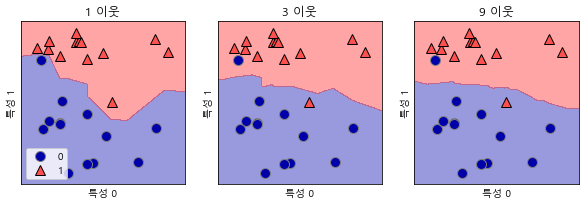

In [88]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# 이웃의 수가 늘어날 수록 결정 경계가 부드러워짐(=이웃을 적게 사용하면 모델의 복잡도가 높아짐)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)
plt.show() # 책에는 없음

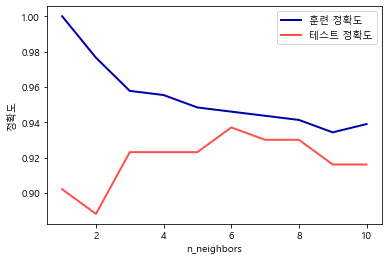

In [89]:
from sklearn.datasets import load_breast_cancer

# stratify -> 일정 비율 유지
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show() # 책에는 없음

#### k-최근접 이웃 회귀

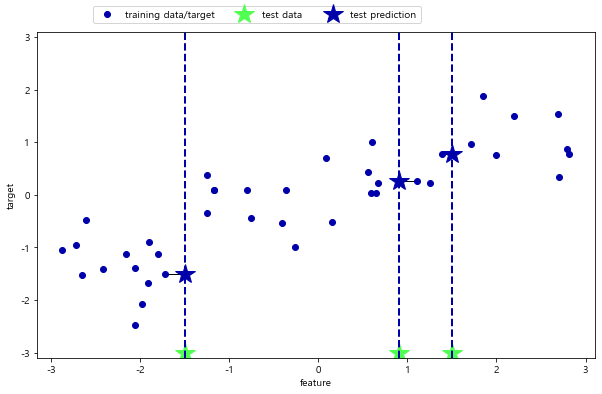

In [90]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

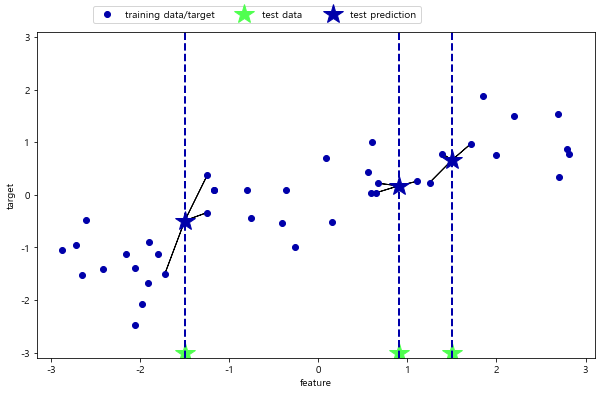

In [91]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [92]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3, metric='manhattan') # metric = euclidean
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=3)

In [93]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [94]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


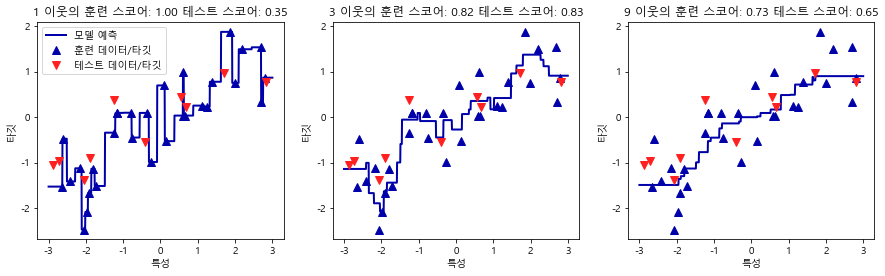

In [95]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show()


#### KNeighborsRegressor 분석

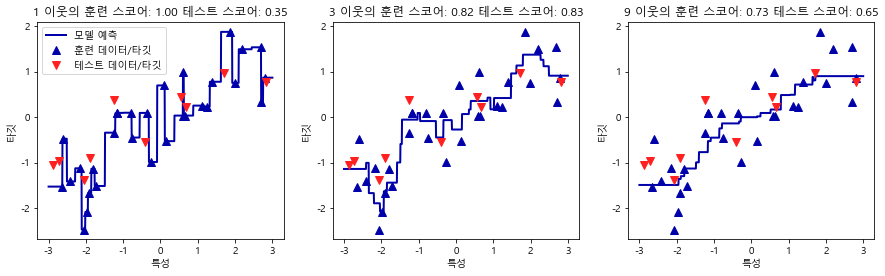

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line)) # 데이터 사이의 선
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8) # train set의 feature와 label 
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8) # test set의 feature와 label 

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show() # 책에는 없음

#### 장단점과 매개변수

### 2.3.3. 선형 모델
#### 회귀의 선형 모델

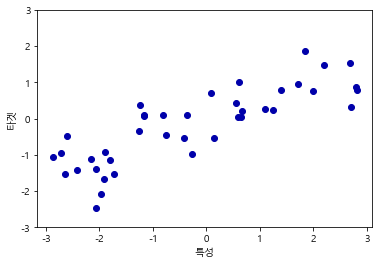

In [97]:
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
# 데이터셋 가져오기
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타겟")
plt.show()

w[0]: 0.393906  b: -0.031804


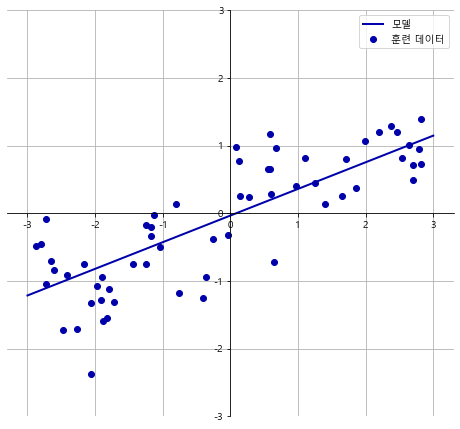

In [98]:
# w=기울기, y=y절편
mglearn.plots.plot_linear_regression_wave()

#### 선형 회귀(최소제곱법)

In [99]:
# from sklearn.neighbors import KNeiborsClassifier
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 선형 회귀
lr = LinearRegression().fit(X_train, y_train)

In [100]:
print("lr.coef_:", lr.coef_) # coefficieint(계수) 기울기(w) coef_ 속성에 저장됨
print("lr.intercept_:", lr.intercept_) # 편향/절편(b) intercept_ 속성에 저장됨 bias

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [101]:
# 과소적합(underfit)
# 모델이 단순하거나 제한적일 경우 발생
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [102]:
from sklearn.datasets import load_boston
bostion = load_boston()
print('Original X.shape :', bostion.data.shape)

Original X.shape : (506, 13)


In [103]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape : ', X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

X.shape :  (506, 104)


In [104]:
# 과적합(Overfit)
# train set의 점수에 비해 test set의 점수가 낮다. (= 외부 입력에 대해 적응력이 낮다. )
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


#### 리지 회귀(Ridge regressor)

In [105]:
from sklearn.linear_model import Ridge

# alpha 값은 모델의 단순화를 조정하는 Hyperparameter
ridge = Ridge().fit(X_train, y_train) # alpha default=1
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [106]:
# alpha 매개변수를 변경하며 확인
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [107]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


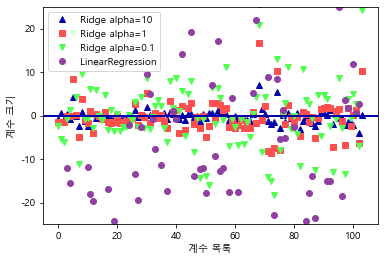

In [108]:
# alpha(가중치(기울기))가 줄어들 수록 feature들이 출력에 주는 영향이 최소화된다.
# alpha가 높을수록 L2규제가 되어 훈련 성능은 낮아지지만 일반화가 더 잘 될 수 있다.
# 일반화 = train set과 test set의 차이의 정도
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show() # 책에는 없음

### Alpha값에 따른 coef_ 속성 변화
  * alpha 값에 다른 coef(w)의 변화를 그래프로 확인해보자
  * alpha 매개변수가 모델을 어떻게 변경시키는지 이해할 수 있다.
  * alpha 값이 높으면 제약이 많아지므로 작은 값일 때 보다 절대값의 크기가 작을 것 이다.(일반화가 쉬울 것이므로)
  * 규제는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 방해하는 것

##### 위 그림을 보면 모든 데이터셋에 대해 릿지와 선형 회귀 모두 훈련세트의 점수가 테스트 세트의 점수보다 높다.
* 릿지 회귀에는 규제가 적용되므로 릿지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮다.
* 그러나 테스트 데이터에서는 릿지의 점수가 더 높으며, 특별히 작은 데이터셋에서는 더 그렇다.
* 두 모델의 성능은 데이터가 많아질수로 좁아지고 마지막에는 선형 회귀가 릿지 회귀를 따라잡는다.
* => 데이터를 충분히 주면 규제 항은 중요성이 떨어진다.


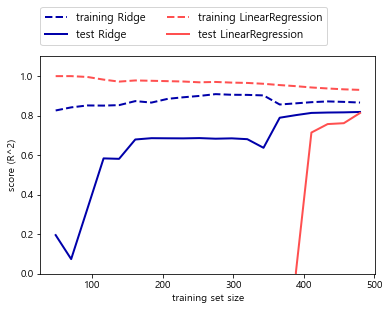

In [109]:
mglearn.plots.plot_ridge_n_samples()

#### 라소

#### 선형 회귀에 규제를 적용하는데 Ridge의 대안으로 Lasso가 있다.
릿지 회귀에서와 같이 라소도 계수를 0에 가깝게 만들려고 한다. 이를 L1 규제라고 한다.<br>
L1규제를 하면 어떤 계수는 정말 0이 된다.<br>
따라서 모델에서 완전히 제외되는 feature가 생긴 다는 뜻이다.<br>
보스턴 주택 가격 데이터셋에 라소를 적용해보자

In [110]:
print(f'X.shape : {X.shape}')

X.shape : (506, 104)


In [111]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


lasso 기본 모델의 train set과 test set 모두 결과가 좋지 않다.<br>
이는 과소적합이며, 104개의 특성 중 4개만 사용한 것으로 확인된다.

In [112]:
# max_iter 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다
# alpha = learning rare, max_iter = 반복 훈련
# alpha가 작을수록 조금씩 탐색을하기 때문에 반복 횟수가 많아져야 한다. 
# 보폭이 큰 사람과 보폭이 적은 사람이 같은 거리를 갈 때 걸음수의 차이와 비슷하다. 
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train) # max_iter default 1,000
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [113]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


* alpha 값을 작게 할수록 사용한 특성의 수를 확인해보면 4 -> 33 -> 96 개로 증가
* alpha 값을 낮추면 규제의 효과가 없어져 과대적합 되기 때문에 LinearRegression의 결과와 비슷해진다.

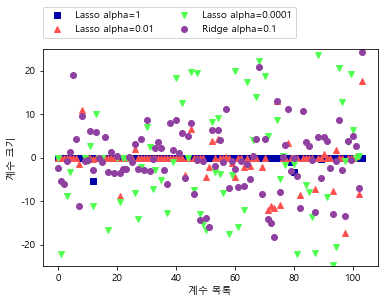

In [114]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.show() # 책에는 없음

alpha = 1 일 때 계수 대부분이 0일 뿐만 아니라 나머지 계수들도 크기가 작다는 것을 알 수 있다.<br>
alpha = 0.1로 줄이면 대부분의 특성이 0이 되는 분포를 얻게된다.<br>
alpha = 0.0001로 줄이면 계수 대부분이 0이 아니고 값도 커져 꽤 규제받지 않은 모델을 얻게 된다.<br>
Ridge 모델은 alpha = 0.01인 라쏘 모델과 성능이 비슷하지만 Ridge를 사용하면 어떤 계수도 0이 되지 않는다.<br>
두 모델 중 보통 Ridge 회귀를 선호한다.<br>
특성이 많고 그 중 일부분만 중요하다면 lasso가 더 좋은 선택일 수 있다.<br>
scikit-learn은 Lasso와 Ridge의 패널티를 결합한 ElasticNet도 제공한다.<br>
ElasticNet의 경우 최고의 성능을 내지만 L1규제와 L2규제를 위한 매개변수 2개를 조정해야 한다. <br>

#### QuantileRegressor

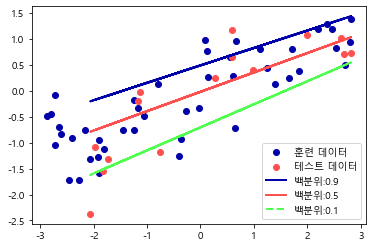

In [115]:
from sklearn.linear_model import QuantileRegressor

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pred_up = QuantileRegressor(quantile=0.9, alpha=0.01).fit(X_train, y_train).predict(X_test)
pred_med = QuantileRegressor(quantile=0.5, alpha=0.01).fit(X_train, y_train).predict(X_test)
pred_low = QuantileRegressor(quantile=0.1, alpha=0.01).fit(X_train, y_train).predict(X_test)

plt.scatter(X_train, y_train, label='훈련 데이터')
plt.scatter(X_test, y_test, label='테스트 데이터')
plt.plot(X_test, pred_up, label='백분위:0.9')
plt.plot(X_test, pred_med, label='백분위:0.5')
plt.plot(X_test, pred_low, label='백분위:0.1')
plt.legend()
plt.show()

#### 분류용 선형 모델
* 가장 널리 알려진 두 개의 선형 분류 알고리즘은linear_model.LogisticRegression에 구현된 **로지스틱 회귀**와 svm.LinearSVC에 구현된 **선형 서포트 벡터 머신**이다.


In [116]:
print(X[:5])

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]


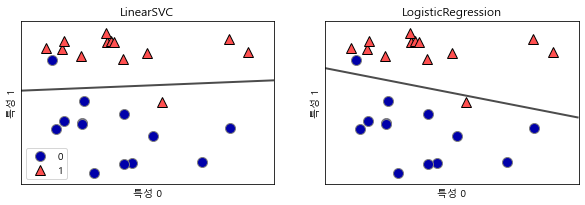

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC # 선형 SVC, 기본 L2 규제(penalty)

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    # print(model)
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
plt.show() # 책에는 없음

* 첫 번째 특성을 x축에 놓고 두 번째 특성을 y축에 놓았다.
* 위쪽은 클래스1, 아래쪽은 클래스 0으로 나누고 있다.
* 이 두모델은 회귀에서 본 Ridge와 같이 L2 규제를 사용한다.
* LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C이다.
* C의값이 놓아지면 규제가 감소하고 계수벡터(w)가 0에 가까워 지며, C의값을 높게하면 훈련세트에 가능한 맞춘다.

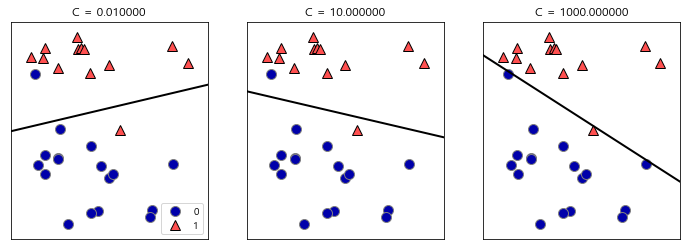

In [118]:
mglearn.plots.plot_linear_svc_regularization()

#### 1) 그림은 아주 작은 C값으로 규제가 많이 적용되었다.
  * 규제가 많이 적용된 모델은 비교적 수평에 가까운 결정 경계를 만들었다
  * 잘못 분류된 데이터는 2개이다.
#### 2) 그림은 C값이 조금 더 크며, 잘못 분류한 두 데이터에 민감해져 결정 경계가 기울어졌다.
#### 3) 그림은 C값을 아주 크게하여, 결정 경계는 크게 기울고, 1개만 잘못 분류되었다.
  * 전체를 정확하게 분류하려 했지만 전체적인 배치를 잘못 파악해 과대적합 경향이있다.

In [119]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train) # default c=1, max_iter=1,000
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [120]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


In [121]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


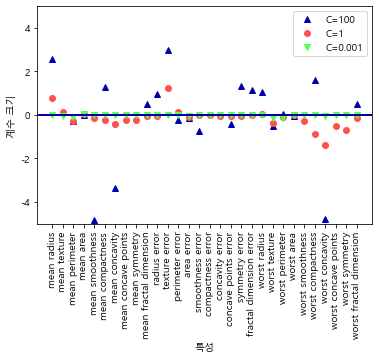

In [122]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show() # 책에는 없음

사이킷런 0.22 버전부터는 `LogisticRegression`의 `solver` 매개변수 기본값이 `lbfgs`로 변경되었습니다. `lbfgs`는 L1 규제를 지원하지 않습니다. 따라서 `solver` 매개변수를 `liblinear`로 지정합니다.

* LogisticRegression은 기본으로 L2규제를 적용하므로 Ridge로 만든 모습과 비슷
* 규제를 강하게 할수록 계수들을 0에 더 가깝게 만들지만 완전히 0이 되지는 않는다.
* 보스턴 주택가격 데이터 셋에 대한 릿지 회귀의 계수 크기 그래프
* 더 이해하기 쉬운 모델을 원한다면 L1규제를 사용하는것이 좋다.
* penalty 매개변수를 통해 L1규제를 사용할 수 있다.
* 다음은 L1 규제를 사용할 때의 분류 정확도와 계수 그래프이다.
* 중요한 점은 규제에서 모든특성을 사용할지(L2규제) 일부 특성만 사용할지(L1)인지 결정하는 penalty 매개변수가 차이이다.

####  L1규제를 사용하여 각기 다른 C값을 적용한 로지스틱 회귀 모델의 계수

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


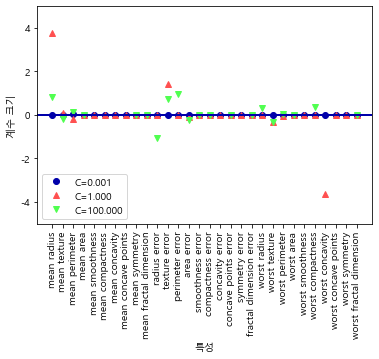

In [123]:
# solver : 최적화 알고리즘, max_iter : 최대 반복 횟수 값, penalty : 규제
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
      lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
      print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
            C, lr_l1.score(X_train, y_train)))
      print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
            C, lr_l1.score(X_test, y_test)))
      plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show() # 책에는 없음

* 중요한 점은 규제에서 모든 특성(L2규제)을 사용할지 일부 특성(L1규제)만 사용할지 인지를 결정하는 penalty 매개변수 차이이다.

#### 다중 클래스 분류용 선형 모델

In [124]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [142]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

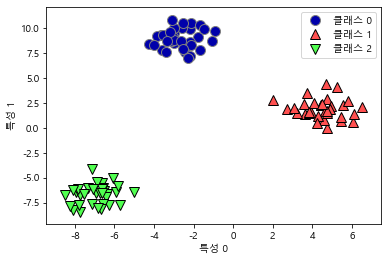

In [143]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])
plt.show() # 책에는 없음

In [151]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [144]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)  
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


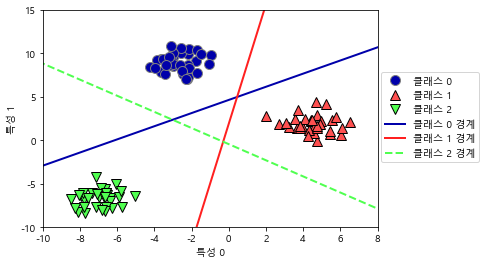

In [127]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)0
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.show() # 책에는 없음

In [153]:
print(line.shape)

(50,)


#### 선형 모델 정리 
* 선형 모델의 주요 매개변수는 
* 회귀모델에서는 alpha였고, LinearSVC와 LogisticRegression에서는 C였다.
* alpha값이 클수록, C값이 작을수록 모델이 단순해진다.
* 보통 C와 alpha는 로그스케일로 최적치를 정한다.(1->0.01,10,10000)

* 그리고 L1규제를 사용할지 L2규제를 사용할지를 정해야 한다.
* 중요한 특성이 많지 않으면 L1을 사용하고, 그렇지 않으면 기본적으로 L2를 사용한다.
* L1규제는 몇가지 특성만 사용하므로 모델에 중요한 특성이 무엇이고 효과가 어느정도인지 설명하기 쉽다.
* 선형 모델은 학습 속도가 빠르고 예측이 빠르다. 또한 다른 모델에 비해 이해하기 쉽다.


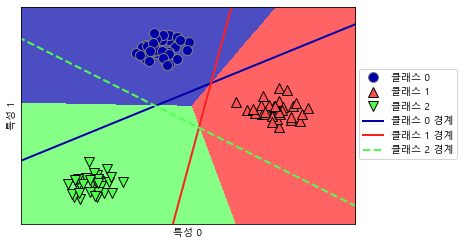

In [128]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

#### 장단점과 매개변수

In [129]:
# 한 줄에서 모델의 객체를 생성과 학습을 한번에 실행합니다
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

In [130]:
logreg = LogisticRegression(max_iter=5000)
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [131]:
y_pred = LogisticRegression(max_iter=5000).fit(X_train, y_train).predict(X_test)

#### SGDClassifier와 SDGRegressor

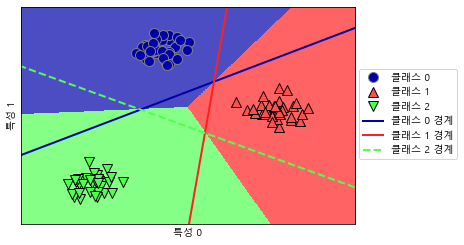

In [132]:
from sklearn.linear_model import SGDClassifier

sgd_c = SGDClassifier(alpha=0.01, learning_rate='adaptive', 
                      eta0=0.1, random_state=42, n_jobs=-1)
sgd_c.fit(X, y)

mglearn.plots.plot_2d_classification(sgd_c, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(sgd_c.coef_, sgd_c.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

In [133]:
from sklearn.linear_model import SGDRegressor

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sgd_r = SGDRegressor(learning_rate='adaptive', eta0=0.1, random_state=42)
sgd_r.fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(sgd_r.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(sgd_r.score(X_test, y_test)))

훈련 세트 점수: 0.91
테스트 세트 점수: 0.77


### 2.3.4 나이브 베이즈 분류기

In [166]:
X = np.array([[0, 1, 0, 1],
            [1, 0, 1, 1],
            [0, 0, 0, 1],
            [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [164]:
np.unique(y)

array([0, 1])

In [169]:
counts = {}
for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1 이 나타난 횟수를 센다.
    print(label)
    print(y == label)
    print(X[y == label]) # y = [0, 1, 0, 1] 중 0과 같은 요소를 찾아 반환
    print(X[y == label].sum(axis=0)) # 위에서 반환된 요소의 인덱스를 기준으로 X의 인덱스를 호출해 행방향으로 더해준다.
    print()
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트:\n", counts)

0
[ True False  True False]
[[0 1 0 1]
 [0 0 0 1]]
[0 1 0 2]

1
[False  True False  True]
[[1 0 1 1]
 [1 0 1 0]]
[2 0 2 1]

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


#### 장단점과 매개변수

### 2.3.5 결정 트리

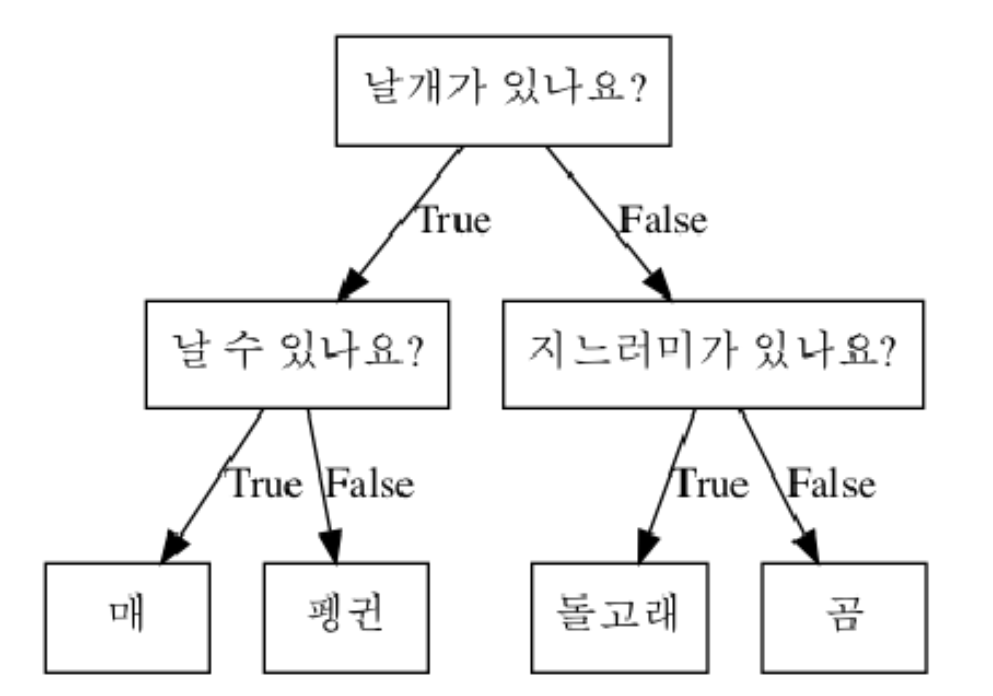

In [171]:
from PIL import Image
Image.open('data/decision_tree.PNG')

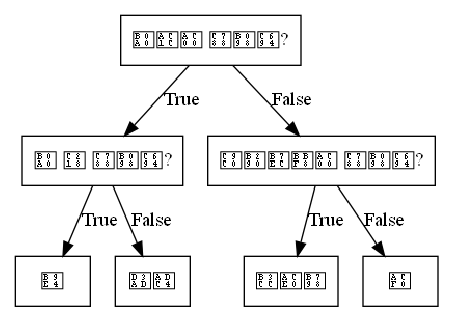

In [170]:
mglearn.plots.plot_animal_tree()

#### 결정 트리 만들기

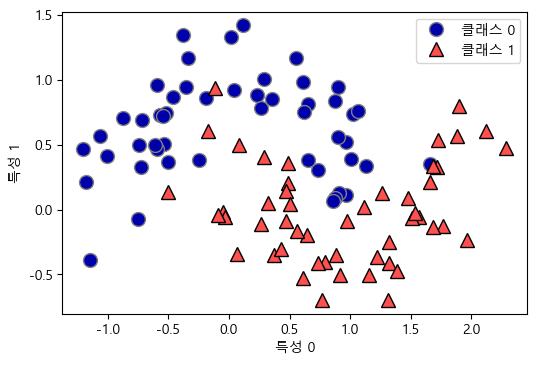

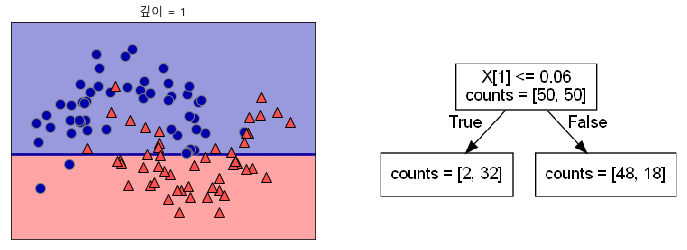

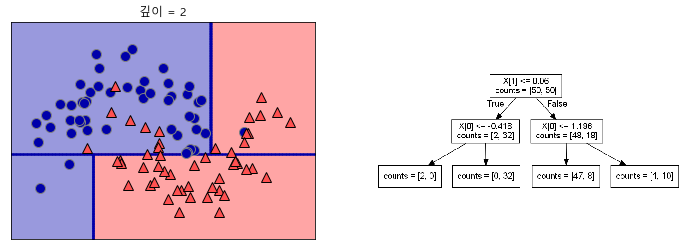

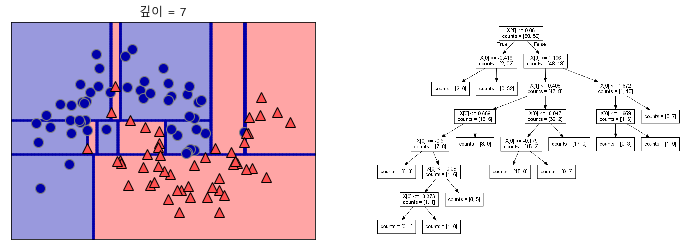

In [172]:
mglearn.plots.plot_tree_progressive()

In [173]:
import sys
print("Python 버전:", sys.version)

import pandas as pd
print("pandas 버전:", pd.__version__)

import matplotlib
print("matplotlib 버전:", matplotlib.__version__)

import numpy as np
print("NumPy 버전:", np.__version__)

import scipy as sp
print("SciPy 버전:", sp.__version__)

import IPython
print("IPython 버전:", IPython.__version__)

import sklearn
print("scikit-learn 버전:", sklearn.__version__)

Python 버전: 3.7.13 (default, Mar 28 2022, 08:03:21) [MSC v.1916 64 bit (AMD64)]
pandas 버전: 1.3.5
matplotlib 버전: 3.5.1
NumPy 버전: 1.21.5
SciPy 버전: 1.7.3
IPython 버전: 7.31.1
scikit-learn 버전: 1.0.2


#### 결정 트리의 복잡도 제어하기

In [174]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


모든 리프 노드가 순수 노드이므로 훈련 세트의 정확도는 100%이다. 즉, 트리는 훈련 데이터의 모든레이블을 완벽하게 기억한다. 결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해진다. 그래서 가지치기하지 않은 트리는 과대적합되기 쉽고 일반화가 어렵다.

#### 사전 가지치기를 통한 학습 능력 판단하기

In [176]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0) # 최대 깊이 4
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


#### 결정 트리 분석

In [181]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["양성", "음성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

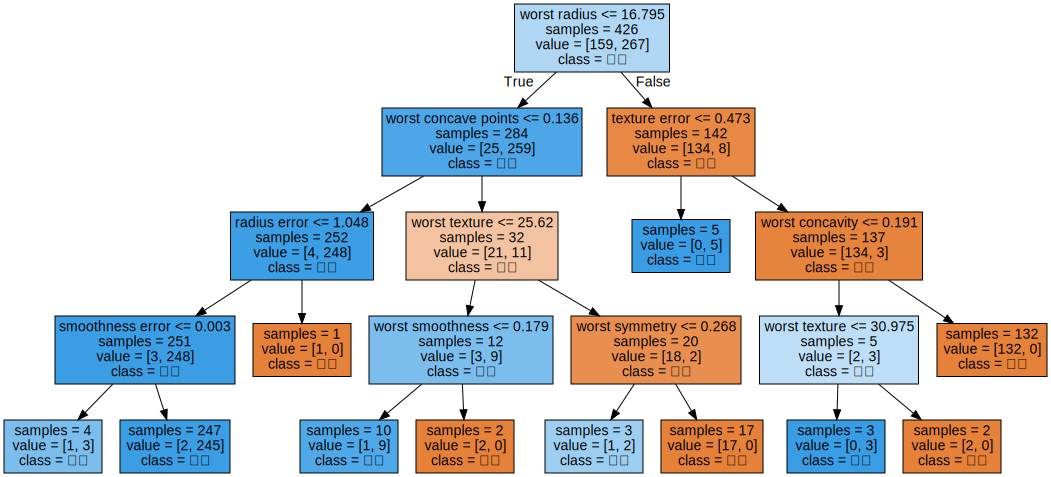

In [182]:
import graphviz

with open("tree.dot", 'r', encoding='utf-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

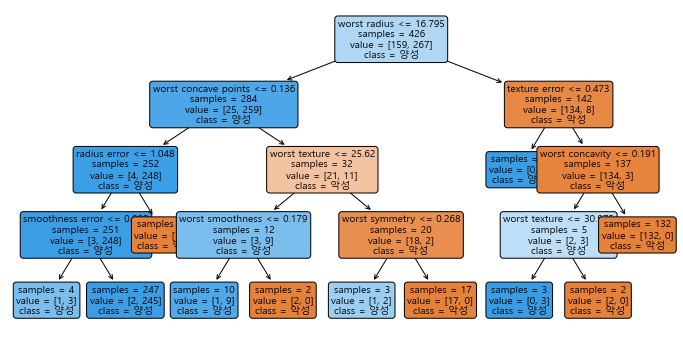

In [183]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(tree, class_names=["악성", "양성"], feature_names=cancer.feature_names,
            impurity=False, filled=True, rounded=True, fontsize=10)
plt.show()

#### 트리의 특성 중요도

In [186]:
print("특성 중요도:\n", tree.feature_importances_) # 전체 특성 중요도를 합치면 1

특성 중요도:
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


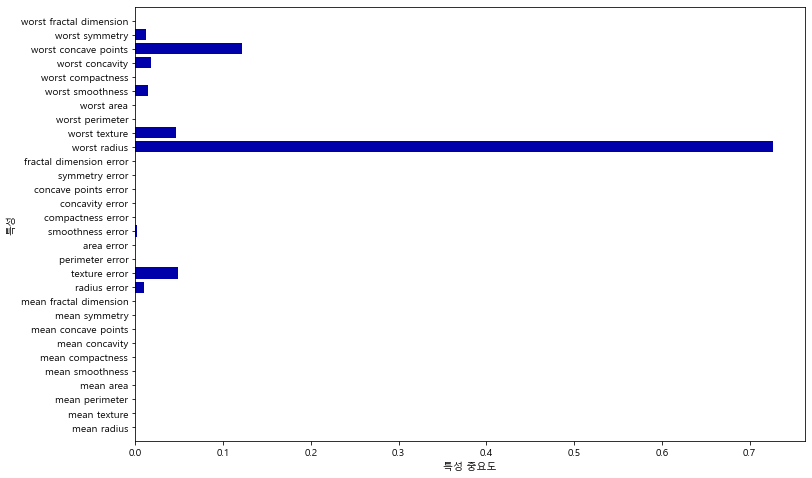

In [197]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1] # feature
    plt.figure(figsize=(12,8))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names) # 30개의 feature data
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

mean radius : 0.000
mean texture : 0.000
mean perimeter : 0.000
mean area : 0.000
mean smoothness : 0.000
mean compactness : 0.000
mean concavity : 0.000
mean concave points : 0.000
mean symmetry : 0.000
mean fractal dimension : 0.000
radius error : 0.010
texture error : 0.048
perimeter error : 0.000
area error : 0.000
smoothness error : 0.002
compactness error : 0.000
concavity error : 0.000
concave points error : 0.000
symmetry error : 0.000
fractal dimension error : 0.000
worst radius : 0.727
worst texture : 0.046
worst perimeter : 0.000
worst area : 0.000
worst smoothness : 0.014
worst compactness : 0.000
worst concavity : 0.018
worst concave points : 0.122
worst symmetry : 0.012
worst fractal dimension : 0.000


<AxesSubplot:>

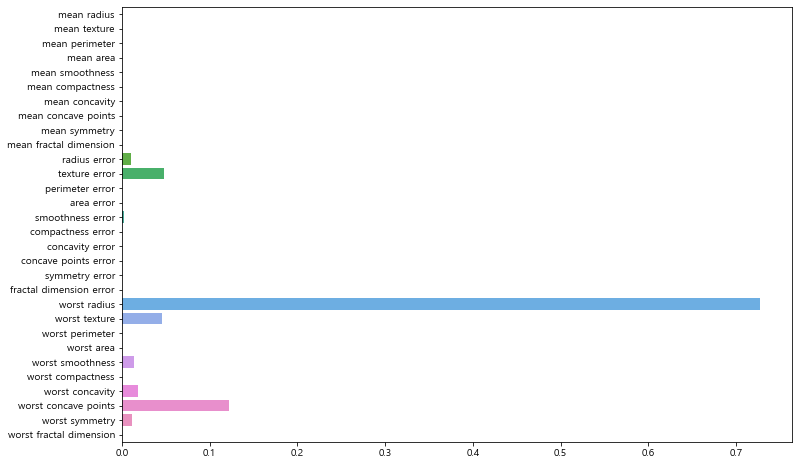

In [206]:
import seaborn as sns
%matplotlib inline

# feature 별 importance 매핑
for name, value in zip(cancer.feature_names, tree.feature_importances_):
    print(f'{name} : {value:.3f}')

# feature importance를 column 별로 시각화
plt.figure(figsize=(12,8))    
sns.barplot(x=tree.feature_importances_, y=cancer.feature_names)

Feature importances: [0. 1.]


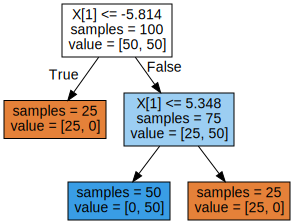

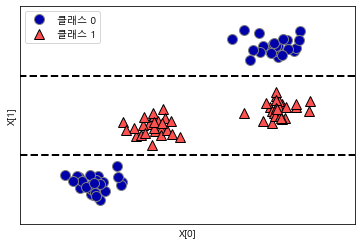

In [211]:
mglearn.plots.plot_tree_not_monotone()
# display(tree) # display를 사용하면 tree형태가 출력되지 않음

#### 램 가격 그래프 그리기

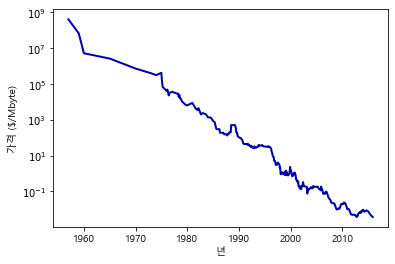

In [214]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"), index_col=0) # 'data/ram_price.csv'

plt.yticks(fontname = "DejaVu Sans") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")
plt.show() # 책에는 없음

In [215]:
ram_prices.head()

date     price
0  1957.0  4.11e+08
1  1959.0  6.79e+07
2  1960.0  5.24e+06
3  1965.0  2.64e+06
4  1970.0  7.34e+05

In [216]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

In [221]:
# np.newaxis : shape을 맞춰주는 효과 (Null과 1은 다르다)
print(data_train.date.to_numpy().shape) 
print(data_train.date.to_numpy()[:, np.newaxis].shape)

(202,)
(202, 1)


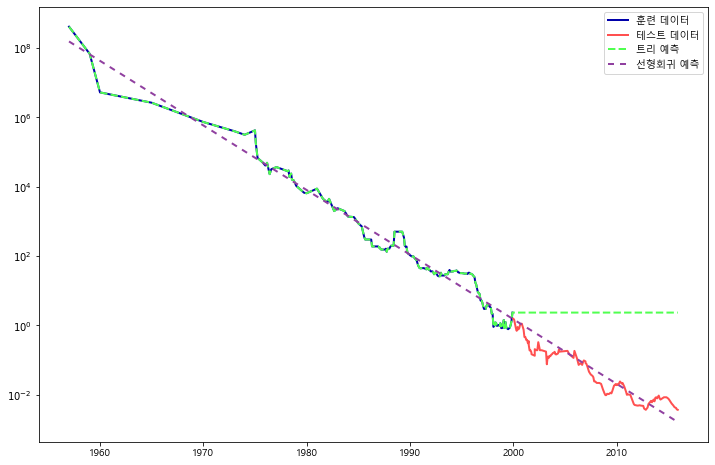

In [223]:
plt.figure(figsize=(12,8))
plt.yticks(fontname = "DejaVu Sans") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()
plt.show() # 책에는 없음

#### 장단점과 매개변수

#### 판다스 데이터 프레임 연동

In [ ]:
tree.fit(data_train[['date']], y_train)

print('특성 개수:', tree.n_features_in_)
print('특성 이름:', tree.feature_names_in_)

특성 개수: 1
특성 이름: ['date']


### 2.3.6 결정 트리의 앙상블
#### 랜덤 포레스트
  * 랜덤 포레스트는 여러개의 결정 트리가 모인 것이다.
  * 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다.
  * 이러한 전략은 구현하기 위해서는 결정 트리를 많이 만들어야 한다.
  * 각각의 트리는 타깃 예측을 잘 해야하고 다른 트리와는 구별되어야 한다.
##### 랜덤 포레스트 구축
  * 랜덤 포레스트 모델을 만들기 위해 생성할 트리의 개수를 정해야 한다.(n_estimater)
##### 랜덤 포레스트 분석

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2) # n_estimators 나무의 개수 5개
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [229]:
forest.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710)]

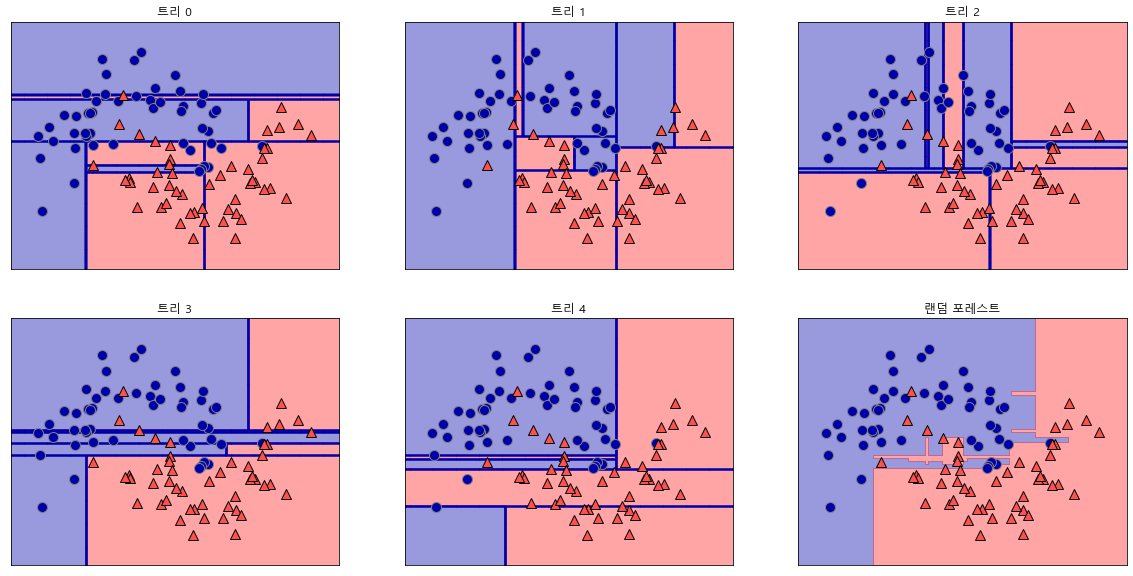

In [232]:
# 인자가 5개인 항목과 6개인 항목은 zip하면 5개만 매치가되어 묶이는건지..?
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)): # axes.ravel() : 전체 subplot 반환(6개), forest.estimators_(5개)
    ax.set_title(f"트리 {i}")
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.show() # 책에는 없음

#### 랜덤 포레스트 cancer 데이터셋 - 100개의 트리

In [237]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


특성 중요도 : [0.025 0.016 0.054 0.049 0.008 0.009 0.055 0.103 0.007 0.003 0.029 0.006
 0.013 0.034 0.004 0.004 0.004 0.007 0.005 0.006 0.117 0.016 0.16  0.063
 0.014 0.012 0.039 0.117 0.012 0.01 ]


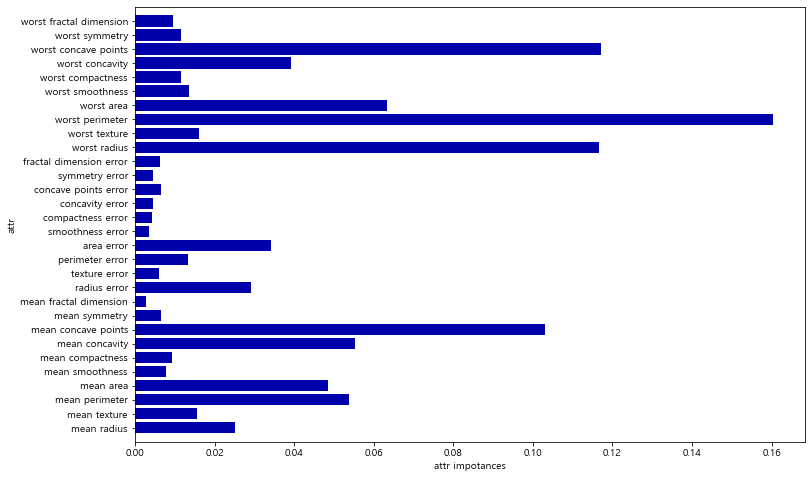

In [243]:
# 특성 중요도
print(f'특성 중요도 : {forest.feature_importances_}')

# 특성 중요도 시각화하기
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(12,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('attr impotances')
    plt.ylabel('attr')
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest)

* 단일 트리의 결과와 마찬가지로, 랜덤 포레스트도 'worst radius'특성이 중요하다고 보지만, 가장 많은 정보를 가진 특성으로는 'worst parimeter'를 선택했다.
* 랜덤 포레스트가 단일 트리보다 더 넓은 시각으로 데이터를 바라볼 수 있다.
___
#### 장단점과 매개변수
 - 회귀와 분류에 있어서 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘이다.
 - 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며, 데이터의 스케일을 맞출 필요도 없다.
 - 기본적으로 랜덤 포레스트는 단일 트리의 단점을 보완하고 장점은 그대로 가지고 있다.
 - 대량의 데이터셋에서 랜덤 포레스트 모델을 만들 때 다소 시간이 걸릴 수 있지만 CPU코어가 많다면 손쉽게 병렬 처리 가능하다.
 - n_jobs 매개변수를 이용하여 사용할 코어 수를 지정할 수 있다(n_jobs = -1로 설정하면, 컴퓨터의 모든 코어를 이용하므로 주의)
 
#### 주의할 점
 - 랜덤 포레스트는 랜덤하기 때문에 random_state를 다르게 지정하면 전혀 다른 모델이 만들어진다.
 - 랜덤 포레스트의 트리가 많을수록 random_state값의 변화에 따른 변동이 적다.
 - 랜덤 포레스트는 텍스트 데이터와 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않는다(이러한 데이터에는 선형 모델이 더 적합)
 - 메모리를 많이 사용하기 때문에 훈련과 예측이 느리다.
 - n_estimators는 클수록 좋다. 더 많은 트리를 평균하면 과대 적합을 줄여 안정적인 모델을 만들 수 있기 때문(단, 메모리와 훈련시간은 증가)
 - max_features는 각 트리가 얼마나 무작위가 될 지를 결정하며, 작은 max_features는 과대적합을 줄인다. 일반적으로는 기본값을 사용하면 된다.


#### 그래디언트 부스팅 회귀 트리

In [244]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [245]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1) # default : max_depth=3, n_estimators=100, learning_rate=0.1...
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [256]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


##### 장단점과 매개변수
---
##### 그래디언트 부스팅 회귀 트리
  * 그래디언트부스팅 회귀 트리는 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 앙상블 기법이다.
  * 이름이 회귀지만 회귀/분류 모두 사용할 수 있다.
  * 랜덤 포레스트와 달리 그래디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.
  * 대신 강력한 사전 가지치기가 사용된다.
  * 그래디언트 부스팅 트리는 머신러닝 경연 대회에서 우승을 많이 차지하였고 업계에서도 널리 사용된다.
  * 랜덤 포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 높은 정확도를 제공해준다.

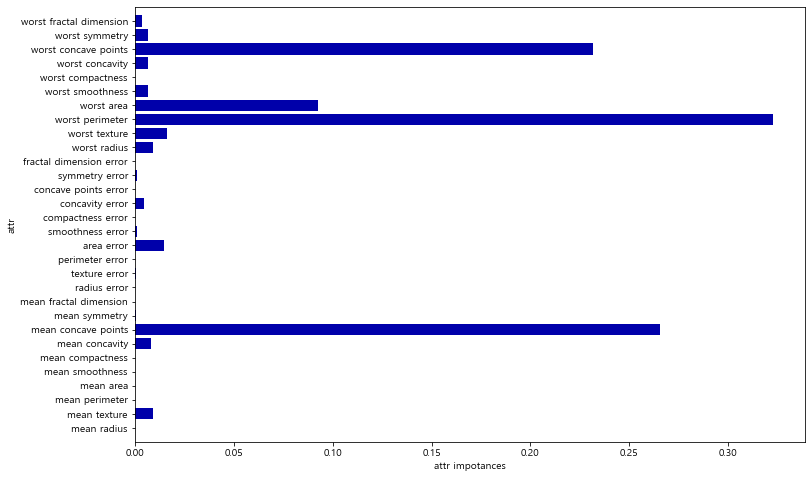

In [257]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

### 2.3.8 커널 서포트 벡터 머신
#### 선형 모델과 비선형 특성

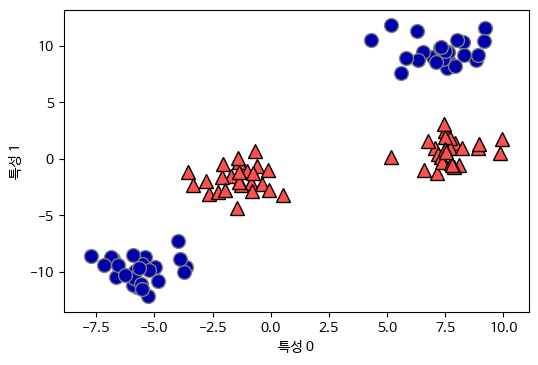

In [ ]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

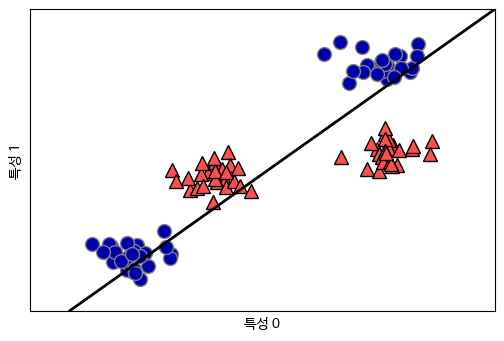

In [ ]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

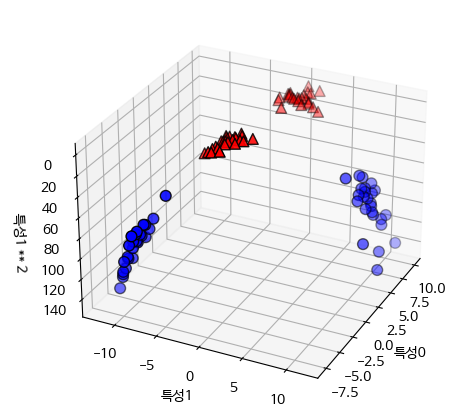

In [ ]:
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
if matplotlib.__version__ >= '3.4':
    # Axes3D가 자동으로 그림에 추가되는 방식은 matplotlib 3.4 버전에서 deprecated 되었습니다.
    # 이와 관련된 경고를 피하려면 auto_add_to_figure=False로 지정하고 figure.add_axes(ax)로 직접 추가하세요.
    ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
    figure.add_axes(ax)
else:
    ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
plt.show() # 책에는 없음

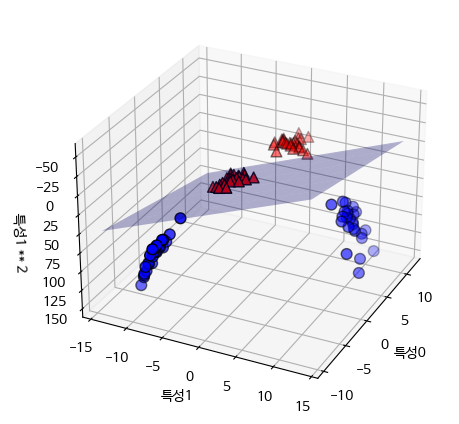

In [ ]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
if matplotlib.__version__ >= '3.4':
    # Axes3D가 자동으로 그림에 추가되는 방식은 matplotlib 3.4 버전에서 deprecated됩니다.
    # 이와 관련된 경고를 피하려면 auto_add_to_figure=False로 지정하고 figure.add_axes(ax)로 직접 추가하세요.
    ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
    figure.add_axes(ax)
else:
    ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
plt.show() # 책에는 없음

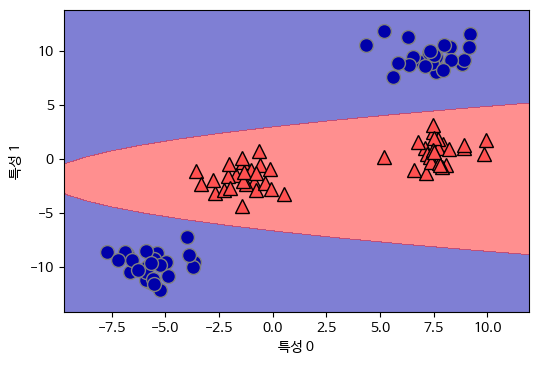

In [ ]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

#### 커널 기법
#### SVM 이해하기

In [264]:
from sklearn.svm import SVC

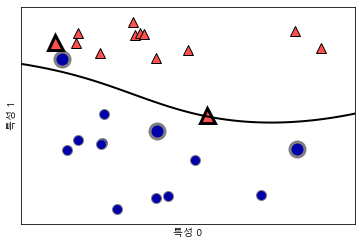

In [267]:
X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y) # C : 일반화 수치, kernel : 알고리즘에 사용되는특성                                               
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

#### SVM 매개변수 튜닝

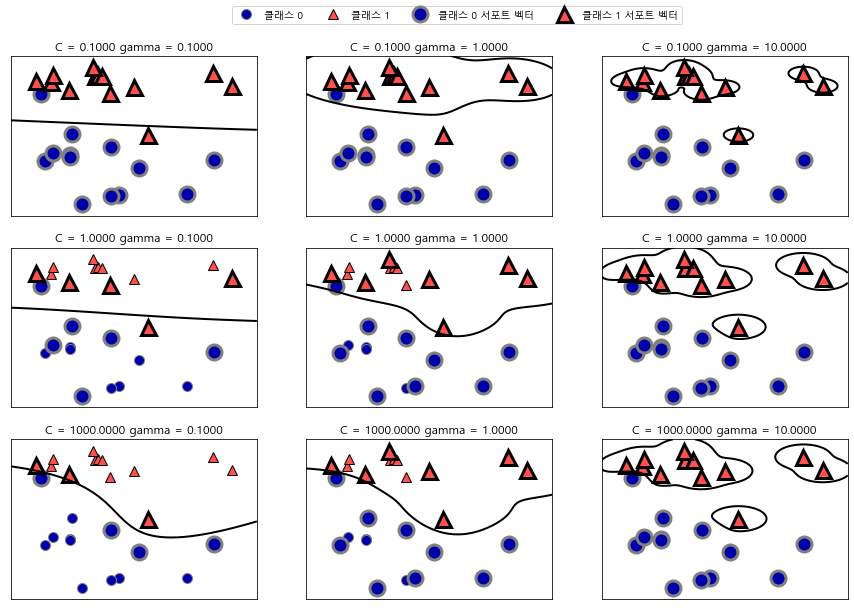

In [268]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                    ncol=4, loc=(.9, 1.2))
plt.show() # 책에는 없음

사이킷런 0.20 버전에서 `SVC` 클래스의 `gamma` 매개변수 옵션에 `auto`외에 `scale`이 추가되었습니다. `auto`는 `1/n_features`, 즉 특성 개수의 역수입니다. `scale`은 `1/(n_features * X.std())`로 스케일 조정이 되지 않은 특성에서 더 좋은 결과를 만듭니다. 사이킷런 0.22 버전부터는 `gamma` 매개변수의 기본값이 `auto`에서 `scale`로 변경됩니다. 서포트 벡터 머신을 사용하기 전에 특성을 표준화 전처리하면 `scale`과 `auto`는 차이가 없습니다.

In [270]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print(f"훈련 세트 정확도: {svc.score(X_train, y_train):.2f}")
print(f"테스트 세트 정확도: {svc.score(X_test, y_test):.2f}")

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


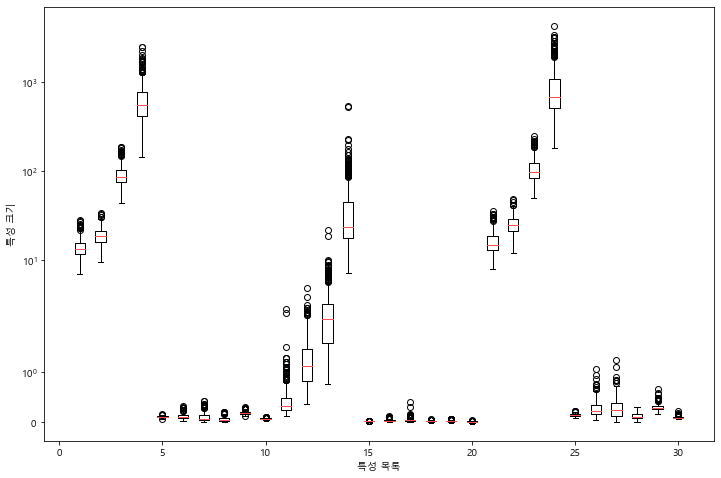

In [272]:
plt.figure(figsize=(12,8))
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")
plt.show()

#### SVM 을 위한 데이터 전처리

In [276]:
cancer_df.tail(10)

mean radius  mean texture  mean perimeter  mean area  ...  \
559        11.51         23.93           74.52      403.5  ...   
560        14.05         27.15           91.38      600.4  ...   
561        11.20         29.37           70.67      386.0  ...   
562        15.22         30.62          103.40      716.9  ...   
563        20.92         25.09          143.00     1347.0  ...   
564        21.56         22.39          142.00     1479.0  ...   
565        20.13         28.25          131.20     1261.0  ...   
566        16.60         28.08          108.30      858.1  ...   
567        20.60         29.33          140.10     1265.0  ...   
568         7.76         24.54           47.92      181.0  ...   

     worst concave points  worst symmetry  worst fractal dimension  label  
559                  0.10            0.21                     0.09      1  
560                  0.10            0.23                     0.08      1  
561                  0.00            0.16                     0.06      1  
562                  0.24            0.41                     0.14      0  
563                  0.25            0.29                     0.10      0  
564                  0.22            0.21                     0.07      0  
565                  0.16            0.26                     0.07      0  
566                  0.14            0.22                     0.08      0  
567                  0.27            0.41                     0.12      0  
568                  0.00            0.29                     0.07      1  

[10 rows x 31 columns]

In [273]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 임
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [277]:
# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다(자세한 내용은 3장에 있습니다)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [278]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972


In [279]:
svc = SVC(C=20)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.979


#### 장단점과 매개변수

### 2.3.9 신경망 (딥러닝)
#### 신경망 모델

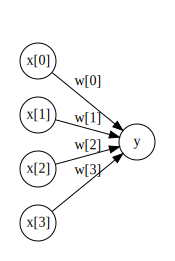

In [ ]:
mglearn.plots.plot_logistic_regression_graph()

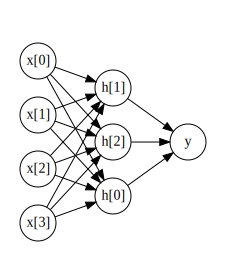

In [ ]:
mglearn.plots.plot_single_hidden_layer_graph()

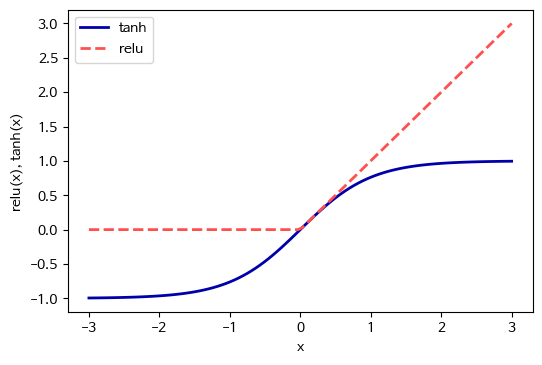

In [ ]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")
plt.show() # 책에는 없음

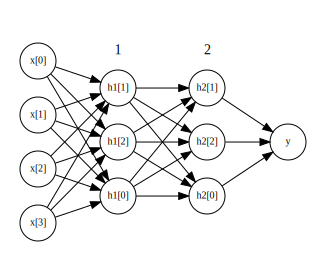

In [ ]:
mglearn.plots.plot_two_hidden_layer_graph()

#### 신경망 튜닝

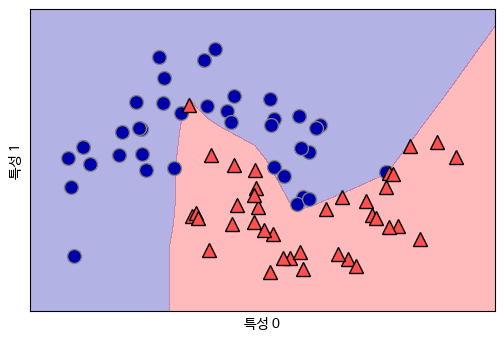

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

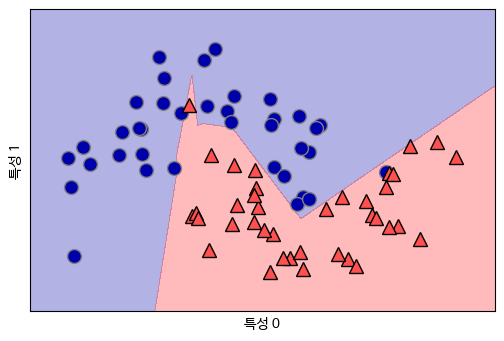

In [ ]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], 
                    max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

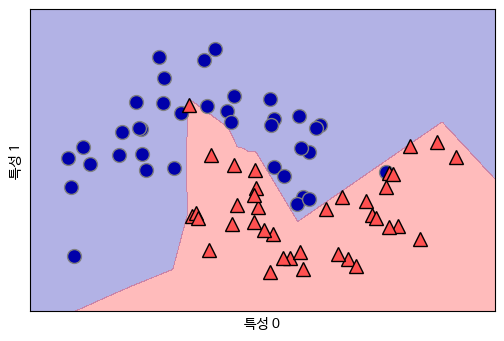

In [ ]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

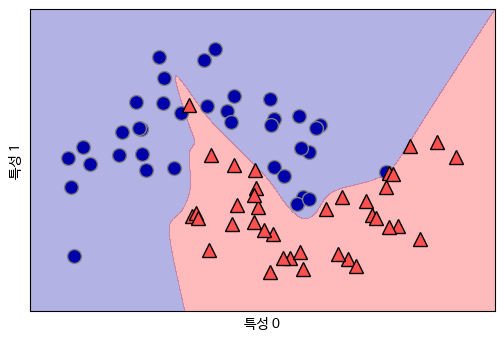

In [ ]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

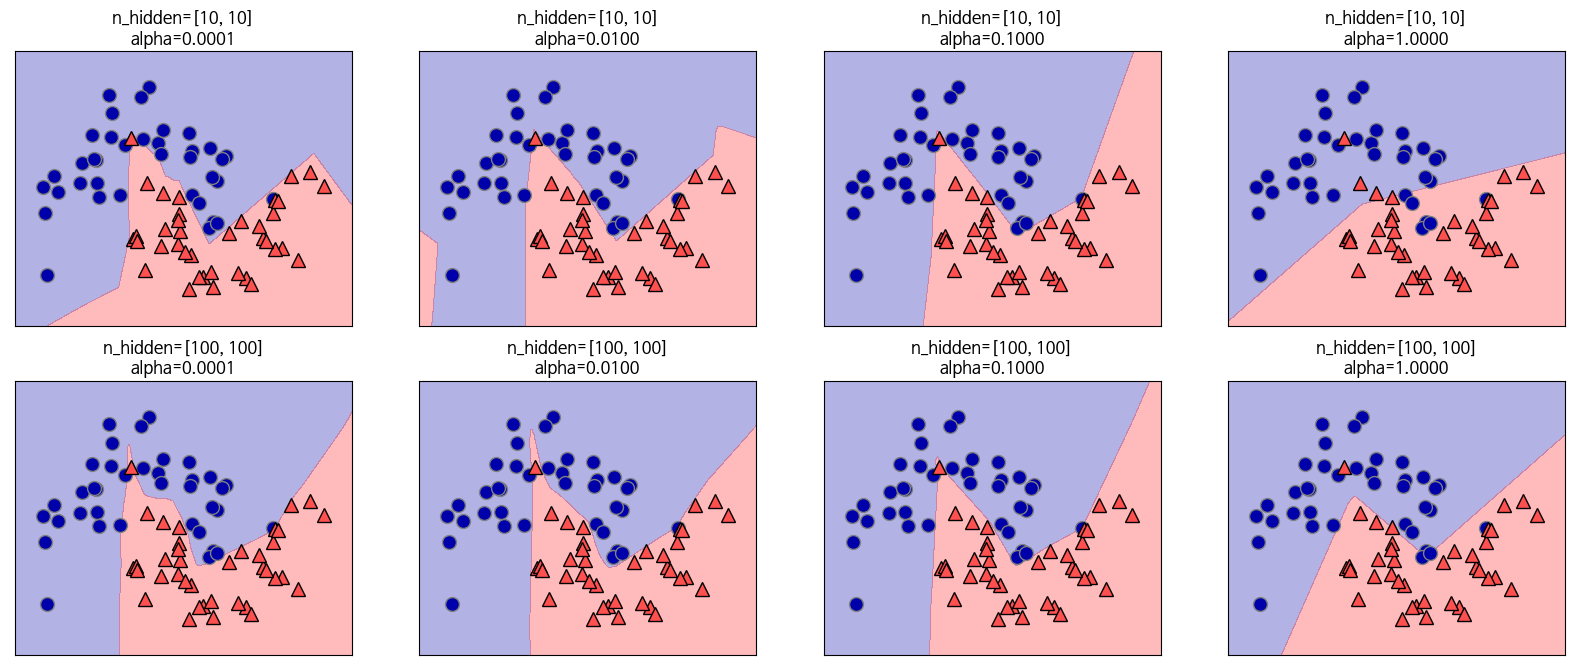

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha, max_iter=1000)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

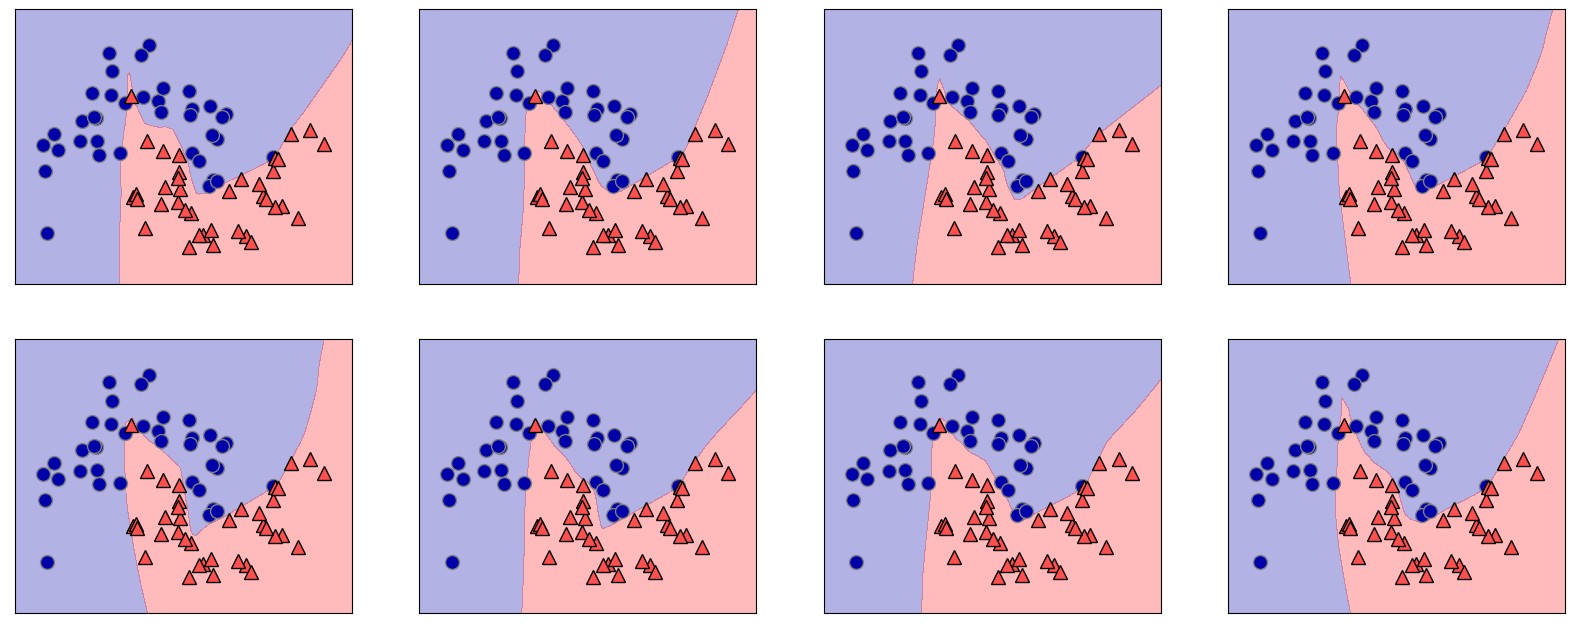

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [ ]:
print("유방암 데이터의 특성별 최대값:\n", cancer.data.max(axis=0))

유방암 데이터의 특성별 최대값:
 [  28.11    39.28   188.5   2501.       0.163    0.345    0.427    0.201
    0.304    0.097    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.079    0.03    36.04    49.54   251.2   4254.
    0.223    1.058    1.252    0.291    0.664    0.207]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [ ]:
# 훈련 세트 각 특성의 평균을 계산합니다
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1 인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다
X_test_scaled = (X_test - mean_on_train) / std_on_train
 
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


/Users/haesun/github/intro_ml_with_python_2nd_revised/.env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [ ]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


In [ ]:
mlp.coefs_[0].std(axis=1), mlp.coefs_[0].var(axis=1)

(array([0.026, 0.041, 0.033, 0.031, 0.017, 0.018, 0.036, 0.041, 0.024,
        0.017, 0.055, 0.017, 0.04 , 0.037, 0.013, 0.034, 0.012, 0.016,
        0.014, 0.03 , 0.049, 0.052, 0.042, 0.043, 0.032, 0.015, 0.041,
        0.049, 0.038, 0.026]),
 array([0.001, 0.002, 0.001, 0.001, 0.   , 0.   , 0.001, 0.002, 0.001,
        0.   , 0.003, 0.   , 0.002, 0.001, 0.   , 0.001, 0.   , 0.   ,
        0.   , 0.001, 0.002, 0.003, 0.002, 0.002, 0.001, 0.   , 0.002,
        0.002, 0.001, 0.001]))

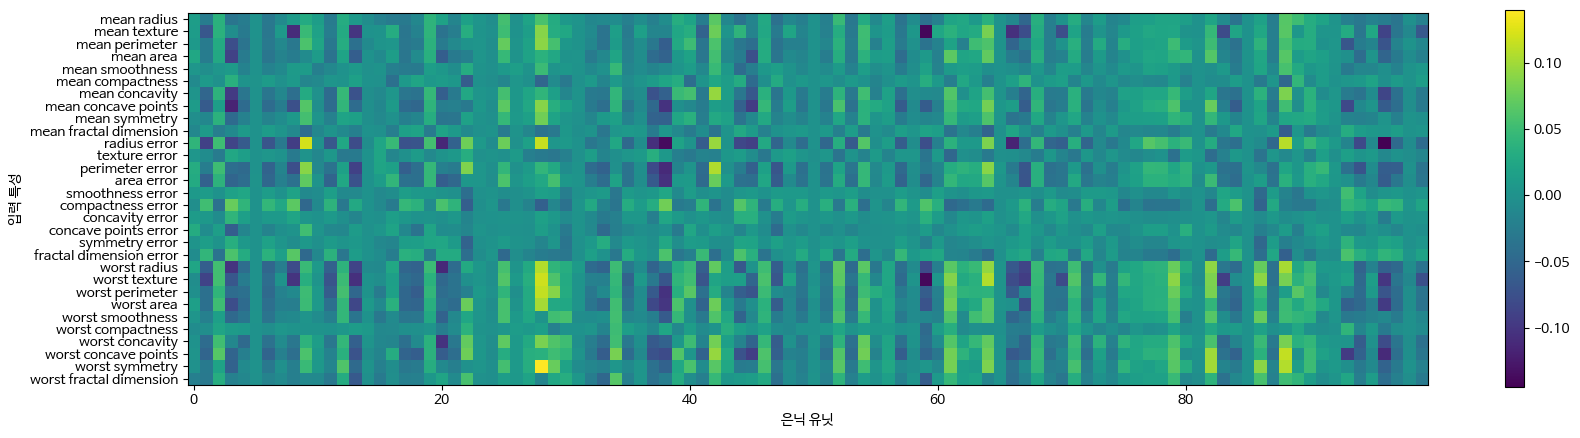

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()
plt.show() # 책에는 없음

#### 장단점과 매개변수
#### 신경망의 복잡도 추정

## 2.4 분류 예측의 불확실성 추정

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예제를 위해 클래스의 이름을 "blue" 와 "red" 로 바꿉니다
y_named = np.array(["blue", "red"])[y]

# 여러개의 배열을 한꺼번에 train_test_split 에 넣을 수 있습니다
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같습니다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# 그래디언트 부스팅 모델을 만듭니다
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

### 2.4.1 결정 함수

In [ ]:
print("X_test.shape:", X_test.shape)
print("결정 함수 결과 형태:", gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [ ]:
# 결정 함수 결과 중 앞부분 일부를 확인합니다
print("결정 함수:\n", gbrt.decision_function(X_test)[:6])

결정 함수:
 [ 4.136 -1.702 -3.951 -3.626  4.29   3.662]


In [ ]:
print("임계치와 결정 함수 결과 비교:\n",
      gbrt.decision_function(X_test) > 0)
print("예측:\n", gbrt.predict(X_test))

임계치와 결정 함수 결과 비교:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [ ]:
# 불리언 값을 0과 1로 변환합니다
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# classes_에 인덱스로 사용합니다
pred = gbrt.classes_[greater_zero]
# pred 와 gbrt.predict의 결과를 비교합니다
print("pred 는 예측 결과와 같다:",
      np.all(pred == gbrt.predict(X_test)))

pred 는 예측 결과와 같다: True


In [ ]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최소값: {:.2f} 최대값: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

결정 함수 최소값: -7.69 최대값: 4.29


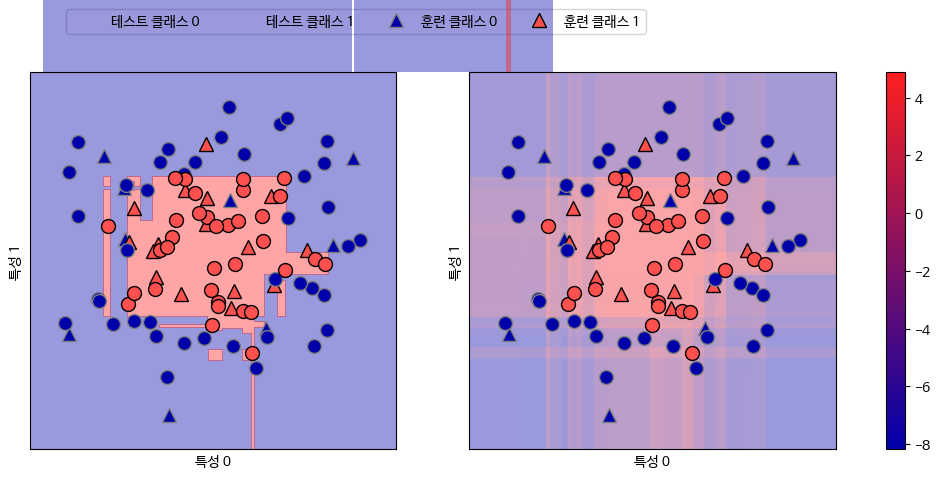

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))
plt.show() # 책에는 없음

### 2.4.2 예측 확률

In [ ]:
print("확률 값의 형태:", gbrt.predict_proba(X_test).shape)

확률 값의 형태: (25, 2)


In [ ]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("Predicted probabilities:\n",
      gbrt.predict_proba(X_test[:6]))

Predicted probabilities:
 [[0.016 0.984]
 [0.846 0.154]
 [0.981 0.019]
 [0.974 0.026]
 [0.014 0.986]
 [0.025 0.975]]


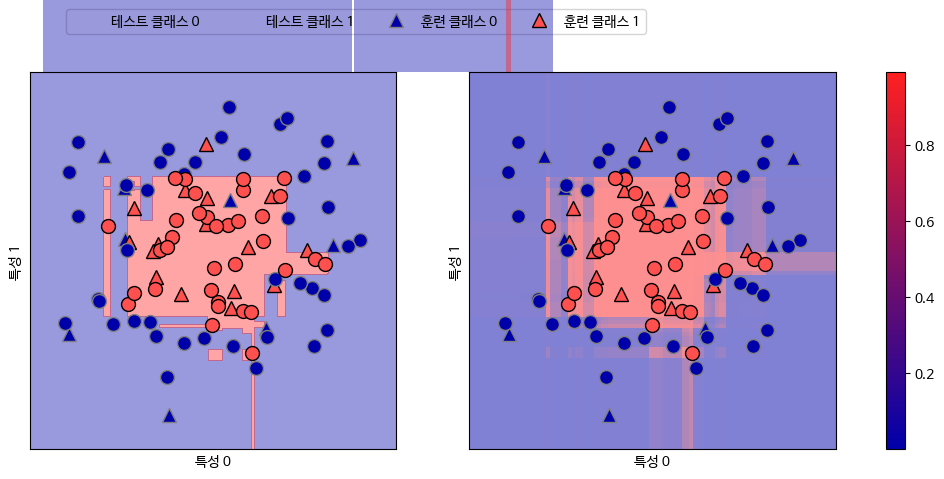

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
# colorbar 를 감추지 않습니다.
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))
plt.show() # 책에는 없음

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

### 2.4.3 다중 분류에서의 불확실성

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [ ]:
print("결정 함수의 결과 형태:", gbrt.decision_function(X_test).shape)
# decision function 결과 중 앞부분 일부를 확인합니다.
print("결정 함수 결과:\n", gbrt.decision_function(X_test)[:6, :])

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
 [[-1.996  0.048 -1.927]
 [ 0.061 -1.908 -1.928]
 [-1.991 -1.876  0.097]
 [-1.996  0.048 -1.927]
 [-1.997 -0.135 -1.203]
 [ 0.061 -1.908 -1.928]]


In [ ]:
print("가장 큰 결정 함수의 인덱스:\n",
      np.argmax(gbrt.decision_function(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [ ]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("예측 확률:\n", gbrt.predict_proba(X_test)[:6])
# 행 방향으로 확률을 더하면 1 이 됩니다
print("합:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

예측 확률:
 [[0.102 0.788 0.109]
 [0.783 0.109 0.107]
 [0.098 0.11  0.792]
 [0.102 0.788 0.109]
 [0.104 0.667 0.229]
 [0.783 0.109 0.107]]
합: [1. 1. 1. 1. 1. 1.]


In [ ]:
print("가장 큰 예측 확률의 인덱스:\n",
      np.argmax(gbrt.predict_proba(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 예측 확률의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


사이킷런 0.20 버전에서 `LogisticRegression`의 `multi_class` 매개변수 옵션에 `auto`가 추가되었습니다. `auto`로 설정하면 이진 분류이거나 `solver`가 `liblinear`일 경우에는 `ovr`을 선택하고 그 외에는 `multinomial`을 선택합니다. 사이킷런 0.22 버전부터는 `multi_class` 매개변수의 기본값이 `ovr`에서 `auto`로 변경됩니다.

In [ ]:
logreg = LogisticRegression(max_iter=1000)

# iris 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류:", logreg.classes_)
print("예측:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수의 인덱스:", argmax_dec_func[:10])
print("인덱스를 classses_에 연결:",
      logreg.classes_[argmax_dec_func][:10])

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classses_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


## 2.5 요약 및 정리